In [1]:
!pip install catboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [2]:
!pip install ggplot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 5.3 MB/s 


In [3]:
!pip install plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
#Line style syntax importation.
%matplotlib inline

# Structuring the code.
import math, datetime, time, random

# Accessing, extracting, manipulating and modifying your observations.
import pandas as pd
import numpy as np

# Visualisations
import matplotlib.pyplot as plt
import missingno as msno
import seaborn as sns
import plotly
import plotly.express as px
plt.style.use("seaborn-whitegrid")

# Preprocessing
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, label_binarize

# Machine learning
import catboost
from sklearn.model_selection import train_test_split
from sklearn import model_selection, tree, preprocessing, metrics, linear_model
from sklearn.svm import LinearSVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression, LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from catboost import CatBoostClassifier, Pool, cv

# Let's be rebels and ignore warnings for now
import warnings
warnings.filterwarnings('ignore')

In [5]:
# Importing train and test data.

train = pd.read_csv("/content/train.csv")
test = pd.read_csv("/content/test.csv")
gender_submission = pd.read_csv("/content/gender_submission.csv")

# Pclass Feature (Predictor variable). 
> 1. Under the hood processes.
> 2. Visualisations.

In [6]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train.Pclass.head()

0    3
1    1
2    3
3    1
4    3
Name: Pclass, dtype: int64

In [8]:
train.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [9]:
train.Pclass.dtypes

dtype('int64')

In [11]:
train.Pclass.shape

(891,)

In [12]:
train.Pclass.describe()

count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64

In [13]:
train.groupby('Pclass').aggregate('count')

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,186,216,216,216,216,176,214
2,184,184,184,184,173,184,184,184,184,16,184
3,491,491,491,491,355,491,491,491,491,12,491


In [14]:
train.groupby('Pclass').aggregate('sum')

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,99705,136,7111.42,90,77,18177.4125
2,82056,87,5168.83,74,70,3801.8417
3,215625,119,8924.92,302,193,6714.6951


In [15]:
train.groupby('Pclass').aggregate('min')

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Pclass,,,,,,,,,
1,2,0,"Allen, Miss. Elisabeth Walton",female,0.92,0,0,110152,0.0
2,10,0,"Abelson, Mr. Samuel",female,0.67,0,0,11668,0.0
3,1,0,"Abbing, Mr. Anthony",female,0.42,0,0,12460,0.0


In [16]:
train.groupby('Pclass').aggregate('max')

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare
Pclass,,,,,,,,,
1,890,1,"Young, Miss. Marie Grice",male,80.0,3,4,WE/P 5735,512.3292
2,887,1,"del Carlo, Mr. Sebastiano",male,70.0,3,3,W/C 14208,73.5000
3,891,1,"van Melkebeke, Mr. Philemon",male,74.0,8,6,W./C. 6609,69.5500


In [17]:
train.groupby('Pclass').aggregate('std')

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,246.737616,0.484026,14.802856,0.611898,0.693997,78.380373
2,250.852161,0.500623,14.001077,0.601633,0.690963,13.417399
3,264.441453,0.428949,12.495398,1.374883,0.888861,11.778142


In [18]:
train.groupby('Pclass').aggregate('mean')

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,461.597222,0.629630,38.233441,0.416667,0.356481,84.154687
2,445.956522,0.472826,29.877630,0.402174,0.380435,20.662183
3,439.154786,0.242363,25.140620,0.615071,0.393075,13.675550


In [19]:
train.groupby('Pclass').aggregate('median')

,PassengerId,Survived,Age,SibSp,Parch,Fare
Pclass,,,,,,
1,472.0,1.0,37.0,0.0,0.0,60.2875
2,435.5,0.0,29.0,0.0,0.0,14.2500
3,432.0,0.0,24.0,0.0,0.0,8.0500


In [21]:
train.Pclass.agg(['count', 'mean', 'std', 'sum', 'max', 'min'])

count     891.000000
mean        2.308642
std         0.836071
sum      2057.000000
max         3.000000
min         1.000000
Name: Pclass, dtype: float64

In [22]:
pd.pivot_table(train, index = 'Survived', columns = 'Pclass', values = 'Ticket' ,aggfunc ='count')

Pclass,1,2,3
Survived,,,
0,80,97,372
1,136,87,119


In [23]:
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 22}

plt.rc('font', **font)
plt.rcParams.update({'font.size': 15})

Text(0.5, 1.0, 'Evaluations of Age Distributions')

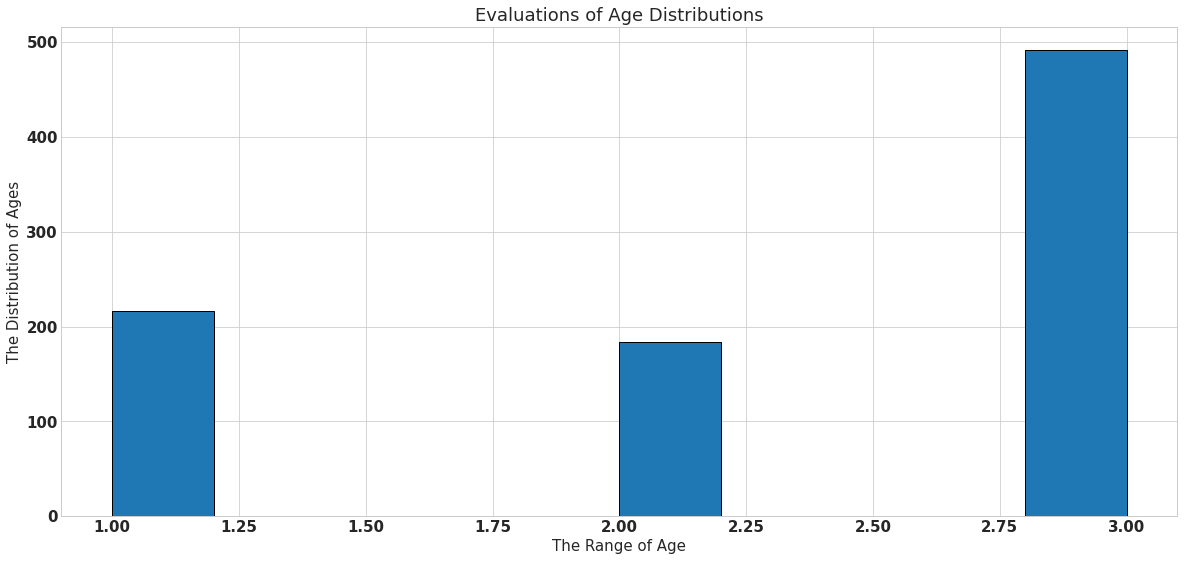

In [26]:
train.Pclass.plot.hist(edgecolor = "black", figsize=(20,9))
plt.xlabel('The Range of Age')
plt.ylabel('The Distribution of Ages')
plt.title('Evaluations of Age Distributions')

Text(0.5, 1.0, 'Evaluations of Age Distributions')

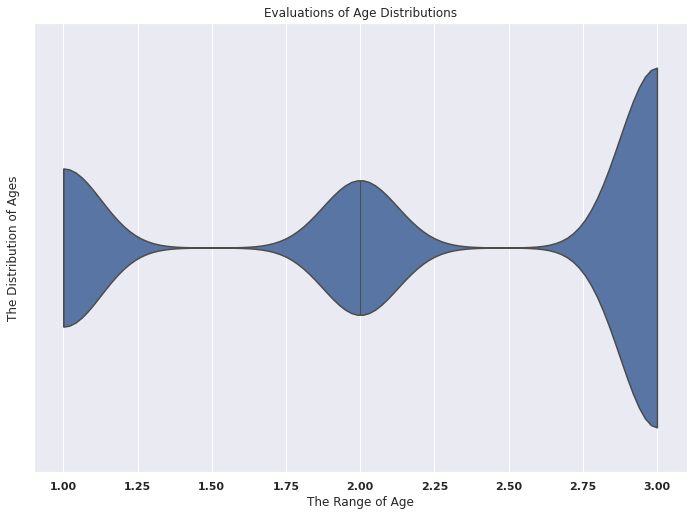

In [27]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.violinplot(x="Pclass", data=train, cut = 0, bw = .15, inner="stick", scale = "count")
plt.xlabel('The Range of Age')
plt.ylabel('The Distribution of Ages')
plt.title('Evaluations of Age Distributions')

Text(0.5, 1.0, 'Evaluations of Age Distributions')

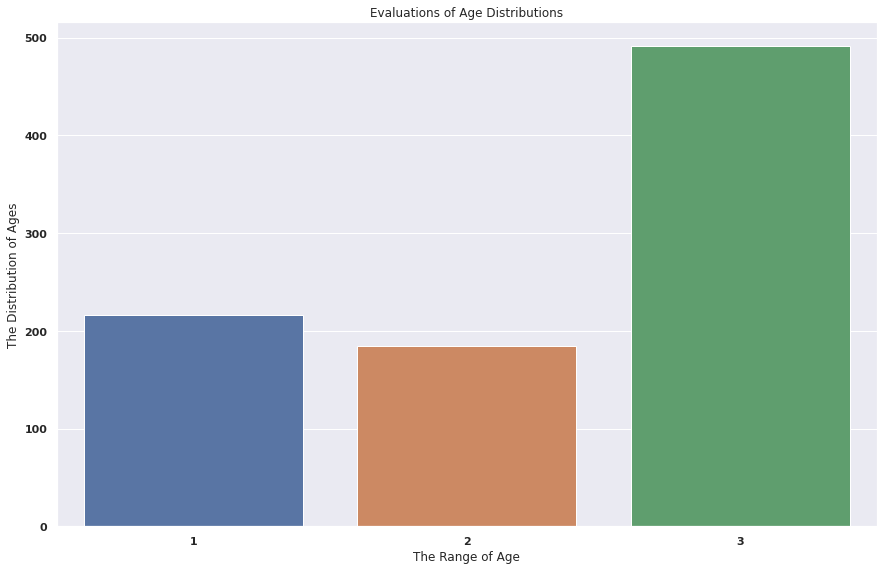

In [28]:
sns.set(rc={'figure.figsize':(14.7,9.27)})
sns.countplot(x="Pclass", data=train)
plt.xlabel('The Range of Age')
plt.ylabel('The Distribution of Ages')
plt.title('Evaluations of Age Distributions')

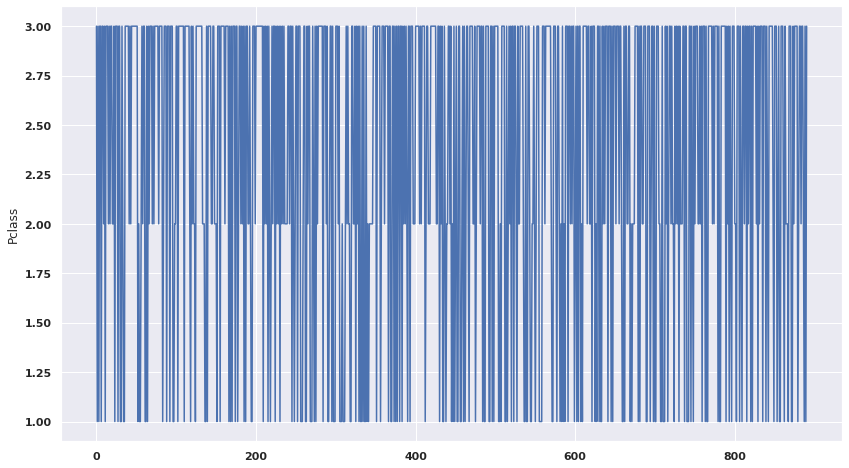

In [29]:
sns.set_style('dark')
sns.set(rc={'figure.figsize':(14,8)})
sns.lineplot(data = train.Pclass)
plt.show()

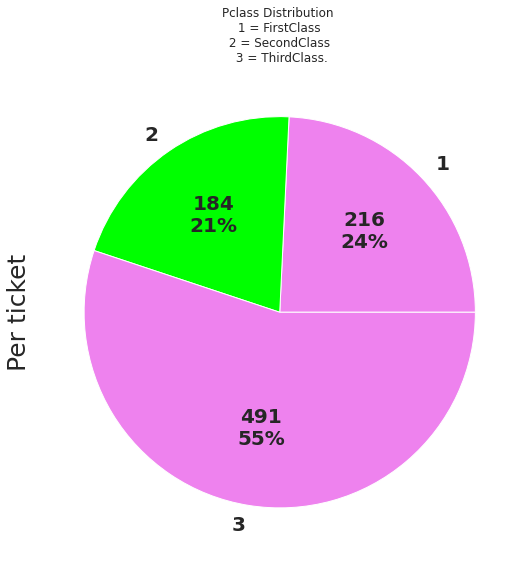

In [35]:
def label_function(val):
    return f'{val / 100 * len(train.Pclass):.0f}\n{val:.0f}%'



fig, ax = plt.subplots(figsize=(15, 8))

train.groupby('Pclass').size().plot(kind='pie', autopct=label_function, textprops={'fontsize': 20},
                                 colors=['violet', 'lime'], ax = ax)
plt.title('Pclass Distribution \n 1 = FirstClass \n 2 = SecondClass \n 3 = ThirdClass.')
ax.set_ylabel('Per ticket', size=25)
plt.tight_layout()
plt.show()